<a href="https://colab.research.google.com/github/syh0397/User_analysis_elec/blob/main/%084_%EA%B5%AC%EB%A7%A4%EB%B6%84%EC%84%9D%2B%ED%8D%BC%EB%84%90%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
#
import scipy.stats as stats
#
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
#한글 나눔 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

In [71]:
df = pd.read_csv('/content/drive/MyDrive/DATA/df_sessioned.csv')
df.columns = ['Unnamed: 0', 'event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'date',
       'time', 'main_category', 'mdi_category', 'sub_category', 'date_',
       'diff', 'check_', 'coh', 'new_session', 'New_sessoion', 'start_day',
       'start_week', 'start_month', 'New_sessoion2', 'Session']

df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,start_week,start_month,New_sessoion2,Session
0,0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9000,1515915625519388267,LJuJVLEjPT,2020-09-24,11:57:06,electronics,telephone,NaN,2020-09-24 11:57:06,0 days 00:01:17,False,150.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14722
1,1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26,computers,components,cooler,2020-09-24 11:57:26,0 days 00:17:45,False,1392.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14697
2,2,2020-09-24 11:57:27,view,215454,2144415927158964449,NaN,NaN,9.8100,1515915625513238515,4TMArHtXQy,2020-09-24,11:57:27,NaN,NaN,NaN,2020-09-24 11:57:27,3 days 01:03:40,New,13454.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,10665
3,3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.8100,1515915625519014356,aGFYrNgC08,2020-09-24,11:57:33,computers,peripherals,printer,2020-09-24 11:57:33,2 days 03:21:40,New,516.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14341
4,4,2020-09-24 11:57:36,view,3658723,2144415921169498184,NaN,cameronsino,15.8700,1515915625510743344,aa4mmk0kwQ,2020-09-24,11:57:36,NaN,NaN,NaN,2020-09-24 11:57:36,11 days 22:16:15,New,6274.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,9870


In [209]:
df_pu = df['event_type'] == 'purchase'
df_pu = df[df_pu]

print(df_pu.shape)
df_pu = df_pu.sort_values(by=['user_id', 'date'] ,ascending=True)

(37346, 26)


In [73]:
# 앞의행 값을 뺐는데(user_id) 0이다 => 같은 user다 => 재구매를 했다.

df_pu['Re'] = df_pu['user_id'].diff().fillna(1.0)
df_pu['Re_purchase'] = np.where( df_pu.Re == 0, 'Re_P', 'just')

In [74]:
# 구매를 한 사람
df_pu.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,start_week,start_month,New_sessoion2,Session,Re,Re_purchase
38837,38837,2020-10-03 11:23:44,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.0300,1515915625353286099,p5I1h2vk1T,2020-10-03,11:23:44,computers,peripherals,wifi,2020-10-03 11:23:44,2 days 21:03:11,New,0.0000,False,new,2020-10-03,2020-10-02,2020-10-01,True,22,1.0000,just
19087,19087,2020-09-29 05:52:55,purchase,137302,2144415924491387038,computers.components.motherboard,asus,55.1600,1515915625353457259,kD2TVJlla1,2020-09-29,05:52:55,computers,components,motherboard,2020-09-29 05:52:55,43 days 12:00:49,New,0.0000,False,new,2020-09-29,2020-09-28,2020-09-01,True,162,171160.0000,just
52153,52153,2020-10-06 10:01:55,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.0500,1515915625353534622,mNGo9YKWcw,2020-10-06,10:01:55,electronics,tablet,NaN,2020-10-06 10:01:55,0 days 00:00:53,False,0.0000,False,exist,2020-10-06,2020-10-05,2020-10-01,False,368,77363.0000,just
52165,52165,2020-10-06 10:03:42,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.0500,1515915625353534622,mNGo9YKWcw,2020-10-06,10:03:42,electronics,tablet,NaN,2020-10-06 10:03:42,0 days 00:23:51,False,0.0000,False,exist,2020-10-06,2020-10-05,2020-10-01,False,368,0.0000,Re_P
52291,52291,2020-10-06 10:29:25,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.0500,1515915625353534622,mNGo9YKWcw,2020-10-06,10:29:25,electronics,tablet,NaN,2020-10-06 10:29:25,0 days 00:00:20,False,0.0000,False,exist,2020-10-06,2020-10-05,2020-10-01,False,368,0.0000,Re_P


#### 첫구매 and 재구매 분석

In [75]:
# 첫구매 
df_pu_first = df_pu[df_pu['Re_purchase'] == 'just']
# 재구매 
df_pu_Rep = df_pu[df_pu['Re_purchase'] == 'Re_P']

print(df_pu_first.shape)
df_pu_first.head()

(21304, 28)


,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,start_week,start_month,New_sessoion2,Session,Re,Re_purchase
38837,38837,2020-10-03 11:23:44,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.0300,1515915625353286099,p5I1h2vk1T,2020-10-03,11:23:44,computers,peripherals,wifi,2020-10-03 11:23:44,2 days 21:03:11,New,0.0000,False,new,2020-10-03,2020-10-02,2020-10-01,True,22,1.0000,just
19087,19087,2020-09-29 05:52:55,purchase,137302,2144415924491387038,computers.components.motherboard,asus,55.1600,1515915625353457259,kD2TVJlla1,2020-09-29,05:52:55,computers,components,motherboard,2020-09-29 05:52:55,43 days 12:00:49,New,0.0000,False,new,2020-09-29,2020-09-28,2020-09-01,True,162,171160.0000,just
52153,52153,2020-10-06 10:01:55,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.0500,1515915625353534622,mNGo9YKWcw,2020-10-06,10:01:55,electronics,tablet,NaN,2020-10-06 10:01:55,0 days 00:00:53,False,0.0000,False,exist,2020-10-06,2020-10-05,2020-10-01,False,368,77363.0000,just
346502,346502,2020-11-24 17:37:22,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.8600,1515915625353561691,UmL0qYoQh4,2020-11-24,17:37:22,computers,peripherals,wifi,2020-11-24 17:37:22,0 days 05:53:31,New,0.0000,False,new,2020-11-24,2020-11-23,2020-11-01,True,380,27069.0000,just
90694,90694,2020-10-15 05:09:35,purchase,16237,2144415922360680550,computers.peripherals.camera,sven,18.1000,1515915625353900095,12dadbda-acb5-4f26-a5e8-f71814190c04,2020-10-15,05:09:35,computers,peripherals,camera,2020-10-15 05:09:35,0 days 00:00:00,False,0.0000,False,exist,2020-09-27,2020-09-26,2020-09-01,False,429,338404.0000,just


In [76]:
# 카테고리별 구매 건수 순으로 나열
print('메인  카테고리 ')
print(df_pu_first['main_category'].value_counts().head(10))
print('중간 분류 카테고리 ')
print(df_pu_first['mdi_category'].value_counts().head(10))
print('서브카테고리 ')
print(df_pu_first['sub_category'].value_counts().head(10))
print('카테고리 전체')
print(df_pu_first['category_code'].value_counts().head(10))


메인  카테고리 
computers       9315
electronics     4090
stationery      1516
auto             610
appliances       546
construction     538
furniture         71
accessories       31
country_yard      18
medicine          10
Name: main_category, dtype: int64
중간 분류 카테고리 
components     5553
peripherals    2592
telephone      2519
cartrige       1431
notebook        844
audio           669
accessories     610
tools           548
tablet          508
video           312
Name: mdi_category, dtype: int64
서브카테고리 
videocards     3826
printer        1479
motherboard     618
cpu             538
acoustic        469
player          381
camera          322
wifi            226
tv              213
hdd             208
Name: sub_category, dtype: int64
카테고리 전체
computers.components.videocards     3826
electronics.telephone               2519
computers.peripherals.printer       1479
stationery.cartrige                 1431
computers.notebook                   844
computers.components.motherboard     618
comput

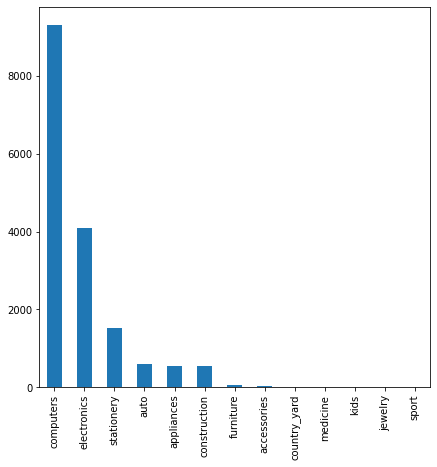

In [77]:
plt.figure(figsize=(7,7))
df_pu_first['main_category'].value_counts().plot(kind='bar')

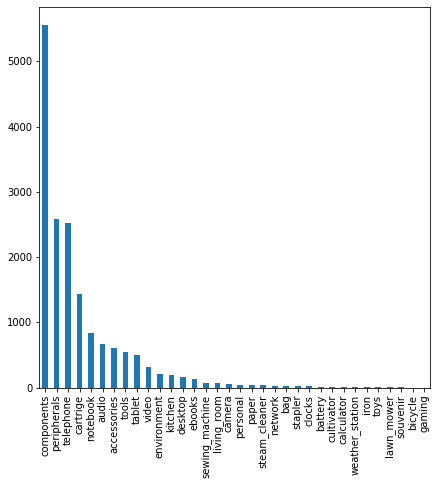

In [78]:
plt.figure(figsize=(7,7))
df_pu_first['mdi_category'].value_counts().plot(kind='bar');

In [79]:
print(df_pu_Rep.shape)
df_pu_Rep.head()

(16042, 28)


,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,start_week,start_month,New_sessoion2,Session,Re,Re_purchase
52165,52165,2020-10-06 10:03:42,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.0500,1515915625353534622,mNGo9YKWcw,2020-10-06,10:03:42,electronics,tablet,NaN,2020-10-06 10:03:42,0 days 00:23:51,False,0.0000,False,exist,2020-10-06,2020-10-05,2020-10-01,False,368,0.0000,Re_P
52291,52291,2020-10-06 10:29:25,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.0500,1515915625353534622,mNGo9YKWcw,2020-10-06,10:29:25,electronics,tablet,NaN,2020-10-06 10:29:25,0 days 00:00:20,False,0.0000,False,exist,2020-10-06,2020-10-05,2020-10-01,False,368,0.0000,Re_P
349275,349275,2020-11-25 09:24:42,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.8600,1515915625353561691,UmL0qYoQh4,2020-11-25,09:24:42,computers,peripherals,wifi,2020-11-25 09:24:42,0 days 00:02:17,False,0.0000,False,exist,2020-11-24,2020-11-23,2020-11-01,False,382,0.0000,Re_P
90695,90695,2020-10-15 05:09:35,purchase,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.7500,1515915625353900095,12dadbda-acb5-4f26-a5e8-f71814190c04,2020-10-15,05:09:35,computers,peripherals,camera,2020-10-15 05:09:35,0 days 03:19:29,New,0.0000,False,new,2020-09-27,2020-09-26,2020-09-01,True,430,0.0000,Re_P
3568,3568,2020-09-25 08:43:04,purchase,3580373,2144415937770553861,stationery.stapler,p.i.t,51.6800,1515915625354561351,M4JERvJr9C,2020-09-25,08:43:04,stationery,stapler,NaN,2020-09-25 08:43:04,2 days 06:04:44,New,0.0000,False,new,2020-09-25,2020-09-24,2020-09-01,True,526,0.0000,Re_P


In [80]:
# 카테고리별 구매 건수 순으로 나열
print('재구매 메인  카테고리 ')
print(df_pu_Rep['main_category'].value_counts().head(10))
print('재구매 중간 분류 카테고리 ')
print(df_pu_Rep['mdi_category'].value_counts().head(10))
print('재구매 서브카테고리 ')
print(df_pu_Rep['sub_category'].value_counts().head(10))
print('재구매 카테고리 전체')
print(df_pu_Rep['category_code'].value_counts().head(10))


재구매 메인  카테고리 
computers       7555
electronics     2678
stationery      1403
auto             482
construction     461
appliances       358
furniture         44
accessories       25
kids               6
country_yard       5
Name: main_category, dtype: int64
재구매 중간 분류 카테고리 
components     5134
peripherals    1768
telephone      1600
cartrige       1308
audio           492
accessories     482
tools           462
notebook        453
tablet          311
video           233
Name: mdi_category, dtype: int64
재구매 서브카테고리 
videocards      3062
printer         1078
cpu              675
motherboard      648
acoustic         379
player           304
power_supply     281
hdd              277
camera           199
wifi             180
Name: sub_category, dtype: int64
재구매 카테고리 전체
computers.components.videocards     3062
electronics.telephone               1600
stationery.cartrige                 1308
computers.peripherals.printer       1078
computers.components.cpu             675
computers.components.

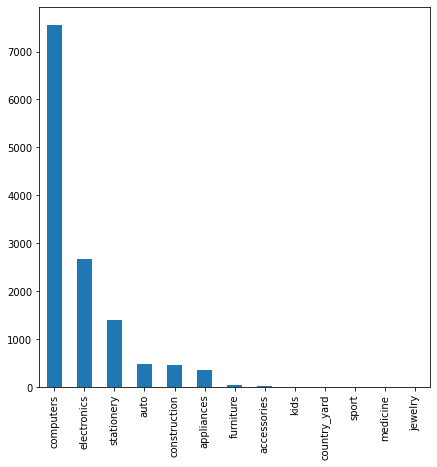

In [81]:
plt.figure(figsize=(7,7))
df_pu_Rep['main_category'].value_counts().plot(kind='bar')

#### 가설검정 
    - 가설 : Price 의 변화폭이 크다면 ⇒ 전환율이 나쁘지 않을까?
    - tv의 Price 변화폭을 살펴봅니다. 

In [129]:
df_tv = df[df['sub_category'] == 'tv']
df_tv.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,start_week,start_month,New_sessoion2,Session
14,14,2020-09-24 12:00:01,view,1455459,2144415927049912542,electronics.video.tv,sony,635.6300,1515915625519385419,sF2S2yMO09,2020-09-24,12:00:01,electronics,video,tv,2020-09-24 12:00:01,5 days 01:08:37,New,400.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14711
40,40,2020-09-24 12:03:01,view,3661285,2144415927049912542,electronics.video.tv,lg,810.6800,1515915625470774320,HMot99bSay,2020-09-24,12:03:01,electronics,video,tv,2020-09-24 12:03:01,2 days 12:33:10,New,2717.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,6351
63,63,2020-09-24 12:10:10,view,3661285,2144415927049912542,electronics.video.tv,lg,810.6800,1515915625519393259,H1crt6uiLB,2020-09-24,12:10:10,electronics,video,tv,2020-09-24 12:10:10,50 days 11:06:36,New,87.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14750
73,73,2020-09-24 12:12:33,view,1667761,2144415927049912542,electronics.video.tv,jvc,161.3000,1515915625519392873,XF3LeYhSFd,2020-09-24,12:12:33,electronics,video,tv,2020-09-24 12:12:33,-1 days +23:58:50,False,132.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14748
85,85,2020-09-24 12:15:29,view,4060928,2144415927049912542,electronics.video.tv,NaN,89.2200,1515915625518130982,3yFCkx2KKW,2020-09-24,12:15:29,electronics,video,tv,2020-09-24 12:15:29,0 days 00:03:32,False,1264.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,13517


In [130]:
print("tv의 최고 가격 : ", df_tv.price.max())
print("tv의 최저 가격 : ",df_tv.price.min())

tv의 최고 가격 :  42590.13
tv의 최저 가격 :  24.92


In [131]:
df_tv.brand.value_counts().head(10)

bbk         4842
lg          3856
starwind    3225
samsung     2098
jvc         1423
hyundai      992
sony         964
acv          584
tcl          414
bq           367
Name: brand, dtype: int64

In [132]:
df_tv_sample = df_tv[df_tv['brand'] == 'samsung']
df_tv_sample.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,start_week,start_month,New_sessoion2,Session
277,277,2020-09-24 12:58:46,view,1414369,2144415927049912542,electronics.video.tv,samsung,1983.8300,1515915625519411326,lZh5dBAAyT,2020-09-24,12:58:46,electronics,video,tv,2020-09-24 12:58:46,0 days 00:00:43,False,94.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14862
1474,1474,2020-09-24 18:06:35,view,407110,2144415927049912542,electronics.video.tv,samsung,181.8300,1515915625519502906,2VhSi8WzIU,2020-09-24,18:06:35,electronics,video,tv,2020-09-24 18:06:35,-1 days +23:43:19,False,0.0000,False,exist,2020-09-24,2020-09-23,2020-09-01,False,15459
1869,1869,2020-09-24 19:54:34,view,1144765,2144415927049912542,electronics.video.tv,samsung,369.9400,1515915625384632878,w0QkdqfMt8,2020-09-24,19:54:34,electronics,video,tv,2020-09-24 19:54:34,9 days 17:45:32,New,27727.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,2295
2778,2778,2020-09-25 05:50:58,view,1549927,2144415927049912542,electronics.video.tv,samsung,251.5900,1515915625519607872,nFrEo2AW7L,2020-09-25,05:50:58,electronics,video,tv,2020-09-25 05:50:58,0 days 00:41:21,New,0.0000,False,new,2020-09-25,2020-09-24,2020-09-01,True,16207
3183,3183,2020-09-25 07:26:51,view,1571717,2144415927049912542,electronics.video.tv,samsung,337.1900,1515915625519630949,Z7ICmmeT8C,2020-09-25,07:26:51,electronics,video,tv,2020-09-25 07:26:51,-1 days +23:59:43,False,216.0000,New,new,2020-09-25,2020-09-24,2020-09-01,True,16392


In [133]:
print("df_tv_sample 최고 가격 : ", df_tv_sample.price.max())
print("df_tv_sample 최저 가격 : ",df_tv_sample.price.min())

df_tv_sample 최고 가격 :  42590.13
df_tv_sample 최저 가격 :  177.08


- 

In [134]:
df_tv_sample_lg = df_tv[df_tv['brand'] == 'lg']
print("df_tv_sample 최고 가격 : ", df_tv_sample_lg.price.max())
print("df_tv_sample 최저 가격 : ",df_tv_sample_lg.price.min())
df_tv_sample_lg.head()

df_tv_sample 최고 가격 :  13627.02
df_tv_sample 최저 가격 :  143.94


,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,start_week,start_month,New_sessoion2,Session
40,40,2020-09-24 12:03:01,view,3661285,2144415927049912542,electronics.video.tv,lg,810.6800,1515915625470774320,HMot99bSay,2020-09-24,12:03:01,electronics,video,tv,2020-09-24 12:03:01,2 days 12:33:10,New,2717.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,6351
63,63,2020-09-24 12:10:10,view,3661285,2144415927049912542,electronics.video.tv,lg,810.6800,1515915625519393259,H1crt6uiLB,2020-09-24,12:10:10,electronics,video,tv,2020-09-24 12:10:10,50 days 11:06:36,New,87.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14750
197,197,2020-09-24 12:41:38,view,1549925,2144415927049912542,electronics.video.tv,lg,380.6500,1515915625519404866,O6iocvsWvy,2020-09-24,12:41:38,electronics,video,tv,2020-09-24 12:41:38,0 days 00:00:04,False,145.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14821
472,472,2020-09-24 13:41:53,view,884451,2144415927049912542,electronics.video.tv,lg,195.2200,1515915625519426442,J2l3dFY2LS,2020-09-24,13:41:53,electronics,video,tv,2020-09-24 13:41:53,-1 days +23:58:46,False,0.0000,False,exist,2020-09-24,2020-09-23,2020-09-01,False,14962
1894,1894,2020-09-24 20:03:08,view,3661285,2144415927049912542,electronics.video.tv,lg,810.6800,1515915625519534556,wsPbS50ul4,2020-09-24,20:03:08,electronics,video,tv,2020-09-24 20:03:08,0 days 00:00:35,False,12.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,15712


In [146]:
date_allnew_ = df_tv.groupby(['brand'])['price'].agg(['min','max'])
date_allnew_ = date_allnew_.reset_index()
# date_allnew_ = date_allnew_.reset_index().sort_values(by = 'price', ascending =False)
date_allnew_.head()

,brand,min,max
0,acer,2267.0300,12149.2400
1,acv,67.8400,475.4000
2,aoc,172.2900,294.4100
3,bbk,87.1600,1270.4600
4,bq,126.6700,239.9700


In [149]:
date_allnew_['price'] = date_allnew_['max'] - date_allnew_['min']
date_allnew_.price.mean()

2191.129999999999



---



In [150]:
df_hdd = df[df['sub_category'] == 'hdd']
df_hdd.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,start_week,start_month,New_sessoion2,Session
30,30,2020-09-24 12:01:33,view,888783,2144415922167742561,computers.components.hdd,NaN,83.0200,1515915625519356010,3jFpdbozOd,2020-09-24,12:01:33,computers,components,hdd,2020-09-24 12:01:33,0 days 00:11:30,False,532.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14653
126,126,2020-09-24 12:24:28,view,4171262,2144415922167742561,computers.components.hdd,NaN,699.6700,1515915625519397521,5Whq7iFuNh,2020-09-24,12:24:28,computers,components,hdd,2020-09-24 12:24:28,0 days 00:00:25,False,0.0000,False,exist,2020-09-24,2020-09-23,2020-09-01,False,14779
130,130,2020-09-24 12:24:53,view,3760012,2144415922167742561,computers.components.hdd,dell,570.5200,1515915625519397521,5Whq7iFuNh,2020-09-24,12:24:53,computers,components,hdd,2020-09-24 12:24:53,0 days 00:47:07,New,0.0000,False,new,2020-09-24,2020-09-23,2020-09-01,True,14780
142,142,2020-09-24 12:27:39,cart,888783,2144415922167742561,computers.components.hdd,NaN,83.0200,1515915625519356010,3jFpdbozOd,2020-09-24,12:27:39,computers,components,hdd,2020-09-24 12:27:39,0 days 00:02:10,False,0.0000,False,exist,2020-09-24,2020-09-23,2020-09-01,False,14653
147,147,2020-09-24 12:29:00,view,631148,2144415922167742561,computers.components.hdd,dell,354.5400,1515915625519400393,AC8V1zlo2X,2020-09-24,12:29:00,computers,components,hdd,2020-09-24 12:29:00,0 days 00:01:50,False,8.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14793


In [151]:
df_hdd.brand.value_counts().head(10)

seagate      1287
smartbuy      926
toshiba       545
transcend     448
samsung       447
adata         306
apacer        276
hp            233
orient        167
espada        150
Name: brand, dtype: int64

In [152]:
print("Hdd의 최고 가격 : ", df_hdd.price.max())
print("hdd의 최저 가격 : ",df_hdd.price.min())

Hdd의 최고 가격 :  3011.11
hdd의 최저 가격 :  7.67


In [155]:
df_hdd_sample = df_hdd[df_hdd['brand'] == 'adata']
print("df_hdd_sample 최고 가격 : ", df_hdd_sample.price.max())
print("df_hdd_sample 최저 가격 : ",df_hdd_sample.price.min())
df_hdd_sample.head()

df_hdd_sample 최고 가격 :  288.86
df_hdd_sample 최저 가격 :  32.76


,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,start_week,start_month,New_sessoion2,Session
7597,7597,2020-09-26 09:35:23,view,1529305,2144415973380194812,computers.components.hdd,adata,61.0500,1515915625519941037,KN4765ff5M,2020-09-26,09:35:23,computers,components,hdd,2020-09-26 09:35:23,0 days 00:00:06,False,118.0000,New,new,2020-09-26,2020-09-25,2020-09-01,True,18773
7905,7905,2020-09-26 10:59:19,view,1745004,2144415973346640379,computers.components.hdd,adata,179.9700,1515915625505240371,d69f22af-c585-47ad-aadf-08c0092ed5af,2020-09-26,10:59:19,computers,components,hdd,2020-09-26 10:59:19,0 days 21:30:59,New,0.0000,False,new,2020-09-26,2020-09-25,2020-09-01,True,8927
11167,11167,2020-09-27 09:32:25,view,1423181,2144415973346640379,computers.components.hdd,adata,32.7600,1515915625520192980,1CvwwdXs27,2020-09-27,09:32:25,computers,components,hdd,2020-09-27 09:32:25,0 days 00:01:47,False,34.0000,New,new,2020-09-27,2020-09-26,2020-09-01,True,20676
11917,11917,2020-09-27 12:47:38,view,1042132,2144415973380194812,computers.components.hdd,adata,68.3700,1515915625446931038,y7QTGurP0T,2020-09-27,12:47:38,computers,components,hdd,2020-09-27 12:47:38,0 days 07:39:02,New,16512.0000,New,new,2020-09-27,2020-09-26,2020-09-01,True,4874
13698,13698,2020-09-27 21:52:51,view,857336,2144415973346640379,computers.components.hdd,adata,100.4100,1515915625512723449,5fabb068-821d-4357-9045-63182127c585,2020-09-27,21:52:51,computers,components,hdd,2020-09-27 21:52:51,0 days 00:00:38,False,0.0000,False,exist,2020-09-27,2020-09-26,2020-09-01,False,10487


In [156]:
gr_hdd = df_hdd.groupby(['brand'])['price'].agg(['min','max'])
gr_hdd = gr_hdd.reset_index()
# date_allnew_ = date_allnew_.reset_index().sort_values(by = 'price', ascending =False)
gr_hdd.head()

,brand,min,max
0,adata,32.7600,288.8600
1,agestar,64.6800,100.9700
2,amd,37.4900,79.1900
3,apacer,28.5900,76.0000
4,asustor,180.0500,395.0000


In [157]:
gr_hdd['price'] = gr_hdd['max'] - gr_hdd['min']
gr_hdd.price.mean()

445.6406976744187



---



In [166]:
df_ps = df[df['sub_category'] == 'power_supply']
print("pw_supply 최고 가격 : ", df_ps.price.max())
print("pw_supply 최저 가격 : ",df_ps.price.min())
gr_ps = df_ps.groupby(['brand'])['price'].agg(['min','max'])
gr_ps = gr_ps.reset_index()
# date_allnew_ = date_allnew_.reset_index().sort_values(by = 'price', ascending =False)
gr_ps['price'] = gr_ps['max'] - gr_ps['min']
print(gr_ps.price.mean())
gr_ps.head()

pw_supply 최고 가격 :  4808.32
pw_supply 최저 가격 :  8.14
169.8565


,brand,min,max,price
0,accord,20.5200,111.1700,90.6500
1,aerocool,25.2400,151.0600,125.8200
2,airmax,18.3000,31.1400,12.8400
3,btcdigger,136.0300,136.0300,0.0000
4,chieftec,39.5400,157.1700,117.6300


In [161]:
df_ps.brand.value_counts().head()

chieftec       1206
aerocool       1144
zalman         1120
thermaltake     965
corsair         961
Name: brand, dtype: int64



---



In [168]:
df_acoustic = df[df['sub_category'] == 'acoustic']
print("gr_df_acoustic 최고 가격 : ", df_acoustic.price.max())
print("gr_df_acoustic 최저 가격 : ",df_acoustic.price.min())
gr_df_acoustic = df_acoustic.groupby(['brand'])['price'].agg(['min','max'])
gr_df_acoustic = gr_df_acoustic.reset_index()
# date_allnew_ = date_allnew_.reset_index().sort_values(by = 'price', ascending =False)
gr_df_acoustic['price'] = gr_df_acoustic['max'] - gr_df_acoustic['min']
print(gr_df_acoustic.price.mean())
gr_df_acoustic.head()

gr_df_acoustic 최고 가격 :  2257.3
gr_df_acoustic 최저 가격 :  1.57
104.12459999999999


,brand,min,max,price
0,acv,11.1100,142.7000,131.5900
1,alpine,30.9500,158.5700,127.6200
2,auchan,1009.8400,1057.4300,47.5900
3,aura,10.0000,103.1700,93.1700
4,baseus,24.7600,24.7600,0.0000


In [169]:
df_components = df[df['mdi_category'] == 'components']
print("df_components 최고 가격 : ", df_components.price.max())
print("df_components 최저 가격 : ",df_components.price.min())
gr_df_components = df_components.groupby(['brand'])['price'].agg(['min','max'])
gr_df_components = gr_df_components.reset_index()
# date_allnew_ = date_allnew_.reset_index().sort_values(by = 'price', ascending =False)
gr_df_components['price'] = gr_df_components['max'] - gr_df_components['min']
print(gr_df_components.price.mean())
gr_df_components.head()

df_components 최고 가격 :  5596.38
df_components 최저 가격 :  1.57
313.0402097902098


,brand,min,max,price
0,accord,20.5200,111.1700,90.6500
1,acer,10.0000,10.9500,0.9500
2,adata,32.7600,288.8600,256.1000
3,aerocool,6.6000,151.0600,144.4600
4,agestar,64.6800,100.9700,36.2900




---



In [170]:
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,start_week,start_month,New_sessoion2,Session
0,0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9000,1515915625519388267,LJuJVLEjPT,2020-09-24,11:57:06,electronics,telephone,NaN,2020-09-24 11:57:06,0 days 00:01:17,False,150.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14722
1,1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26,computers,components,cooler,2020-09-24 11:57:26,0 days 00:17:45,False,1392.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14697
2,2,2020-09-24 11:57:27,view,215454,2144415927158964449,NaN,NaN,9.8100,1515915625513238515,4TMArHtXQy,2020-09-24,11:57:27,NaN,NaN,NaN,2020-09-24 11:57:27,3 days 01:03:40,New,13454.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,10665
3,3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.8100,1515915625519014356,aGFYrNgC08,2020-09-24,11:57:33,computers,peripherals,printer,2020-09-24 11:57:33,2 days 03:21:40,New,516.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,14341
4,4,2020-09-24 11:57:36,view,3658723,2144415921169498184,NaN,cameronsino,15.8700,1515915625510743344,aa4mmk0kwQ,2020-09-24,11:57:36,NaN,NaN,NaN,2020-09-24 11:57:36,11 days 22:16:15,New,6274.0000,New,new,2020-09-24,2020-09-23,2020-09-01,True,9870


In [201]:
tv_value = df[df['sub_category'] == 'tv']
print(df.shape[0], tv_value.shape[0])
tv_value.shape[0]/df.shape[0]

885129 21398


0.02417500725882894

In [228]:
session_zero = df.groupby(['user_id','event_type','category_code'])['Session'].size()
session_zero = session_zero.reset_index()
# date_allnew_ = date_allnew_.reset_index().sort_values(by = 'price', ascending =False)
session_zero

,user_id,event_type,category_code,Session
0,1515915625353226922,view,electronics.clocks,1
1,1515915625353230683,view,computers.peripherals.printer,1
2,1515915625353230683,view,electronics.audio.acoustic,12
3,1515915625353230922,view,computers.components.videocards,1
4,1515915625353234047,view,electronics.audio.headphone,19
...,...,...,...,...
344854,1515915625611023581,view,computers.components.videocards,1
344855,1515915625611023671,view,electronics.telephone,1
344856,1515915625611024014,view,electronics.video.tv,1
344857,1515915625611024020,view,electronics.clocks,1


In [191]:
session_zero = session_zero[session_zero['Session'] == 1]
session_zero

,user_id,event_type,category_code,Session
0,1515915625353226922,view,electronics.clocks,1
1,1515915625353230683,view,computers.peripherals.printer,1
3,1515915625353230922,view,computers.components.videocards,1
6,1515915625353236157,view,electronics.audio.microphone,1
7,1515915625353238403,view,computers.components.power_supply,1
...,...,...,...,...
344854,1515915625611023581,view,computers.components.videocards,1
344855,1515915625611023671,view,electronics.telephone,1
344856,1515915625611024014,view,electronics.video.tv,1
344857,1515915625611024020,view,electronics.clocks,1


In [193]:
session_zero.category_code.value_counts().to_frame().head(20)

,category_code
electronics.telephone,50602
computers.components.videocards,40955
stationery.cartrige,24563
computers.peripherals.printer,23630
computers.notebook,15289
electronics.audio.acoustic,14821
computers.components.motherboard,12332
computers.components.cpu,12157
electronics.video.tv,11866
electronics.tablet,11308


#### 이번 주의 Best 상품을 뽑는다면,

-  어떤 기준을 사용하시겠어요?
      - 이번주의 베스트 상품을 고르는 기준은 아래와 같습니다. 
      1. 구매로 이어져야 합니다.
      2. 매주 꾸준하게 팔린 스터디셀러여야 합니다.

In [214]:
# 구매된 상품 
df_pu_stedy = df_pu.groupby(['date','category_code'])['category_id'].size()
df_pu_stedy = df_pu_stedy.to_frame().reset_index()
df_pu_stedy

,date,category_code,category_id
0,2020-09-24,appliances.environment.vacuum,1
1,2020-09-24,computers.components.cpu,3
2,2020-09-24,computers.components.hdd,1
3,2020-09-24,computers.components.motherboard,1
4,2020-09-24,computers.components.power_supply,1
...,...,...,...
4546,2021-02-28,electronics.clocks,1
4547,2021-02-28,electronics.tablet,4
4548,2021-02-28,electronics.telephone,14
4549,2021-02-28,electronics.video.tv,5


In [216]:
df_pu_stedy = df_pu_stedy[df_pu_stedy['category_id'] > 1]
df_pu_stedy

,date,category_code,category_id
1,2020-09-24,computers.components.cpu,3
5,2020-09-24,computers.components.tv_tuner,3
6,2020-09-24,computers.components.videocards,3
7,2020-09-24,computers.notebook,2
8,2020-09-24,computers.peripherals.camera,11
...,...,...,...
4545,2021-02-28,electronics.audio.music_tools.piano,2
4547,2021-02-28,electronics.tablet,4
4548,2021-02-28,electronics.telephone,14
4549,2021-02-28,electronics.video.tv,5


In [218]:
df_pu_stedy.date.nunique()

158

In [225]:
stedy_seller = df_pu_stedy.category_code.value_counts().to_frame()
stedy_seller.tail(15)

,category_code
kids.toys,2
appliances.personal.scales,2
appliances.kitchen.juicer,1
appliances.kitchen.coffee_grinder,1
construction.tools.generator,1
computers.peripherals.vr,1
construction.tools.pump,1
construction.tools.heater,1
jewelry.souvenir,1
medicine.tools.tonometer,1


#### 오랫동안 방문하지 않은 유저

In [231]:
leav__ = df.groupby(['user_id','event_type','category_code','diff'])['Session'].size()
leav__  = leav__.reset_index()
# date_allnew_ = date_allnew_.reset_index().sort_values(by = 'price', ascending =False)
leav__

,user_id,event_type,category_code,diff,Session
0,1515915625353226922,view,electronics.clocks,-24 days +19:01:57,1
1,1515915625353230683,view,computers.peripherals.printer,-72 days +21:50:31,1
2,1515915625353230683,view,electronics.audio.acoustic,0 days 00:00:07,1
3,1515915625353230683,view,electronics.audio.acoustic,0 days 00:00:09,1
4,1515915625353230683,view,electronics.audio.acoustic,0 days 00:01:04,1
...,...,...,...,...,...
637580,1515915625611023376,view,computers.notebook,0 days 00:02:07,1
637581,1515915625611023581,view,computers.components.videocards,0 days 00:01:05,1
637582,1515915625611023671,view,electronics.telephone,0 days 00:00:43,1
637583,1515915625611024014,view,electronics.video.tv,0 days 00:00:04,1


In [234]:
#### 한번 방문하고 그뒤로 방문하지 않은 유저 
leav__o = leav__[leav__['Session'] == 1]
leav__o

,user_id,event_type,category_code,diff,Session
0,1515915625353226922,view,electronics.clocks,-24 days +19:01:57,1
1,1515915625353230683,view,computers.peripherals.printer,-72 days +21:50:31,1
2,1515915625353230683,view,electronics.audio.acoustic,0 days 00:00:07,1
3,1515915625353230683,view,electronics.audio.acoustic,0 days 00:00:09,1
4,1515915625353230683,view,electronics.audio.acoustic,0 days 00:01:04,1
...,...,...,...,...,...
637580,1515915625611023376,view,computers.notebook,0 days 00:02:07,1
637581,1515915625611023581,view,computers.components.videocards,0 days 00:01:05,1
637582,1515915625611023671,view,electronics.telephone,0 days 00:00:43,1
637583,1515915625611024014,view,electronics.video.tv,0 days 00:00:04,1


In [249]:
#### 한번 방문하고 그뒤로 방문하지 않은 유저 
leav___x = leav__[leav__['Session'] >= 2]
leav___x

,user_id,event_type,category_code,diff,Session
18,1515915625353234047,view,electronics.audio.headphone,0 days 00:00:06,2
19,1515915625353234047,view,electronics.audio.headphone,0 days 00:00:08,2
78,1515915625353294441,view,electronics.telephone,0 days 00:00:08,2
80,1515915625353294441,view,electronics.telephone,0 days 00:00:10,4
84,1515915625353294441,view,electronics.telephone,0 days 00:00:14,2
...,...,...,...,...,...
637126,1515915625610976222,view,computers.components.videocards,0 days 00:00:08,2
637127,1515915625610976222,view,computers.components.videocards,0 days 00:00:09,3
637131,1515915625610976222,view,computers.components.videocards,0 days 00:00:16,2
637542,1515915625611018641,view,computers.components.videocards,0 days 00:00:10,2


In [254]:

cond = leav___x['diff'] >= '0 days 01:00:00'
k = leav___x[cond]
k

,user_id,event_type,category_code,diff,Session
149,1515915625353416040,view,computers.components.hdd,7 days 00:00:08,4
150,1515915625353416040,view,computers.components.hdd,7 days 00:00:09,4
152,1515915625353416040,view,computers.components.hdd,7 days 00:00:11,2
58423,1515915625523765273,view,computers.peripherals.printer,0 days 01:49:14,2
113464,1515915625529330827,view,electronics.audio.acoustic,0 days 23:36:46,2
160766,1515915625533792857,view,electronics.video.projector,0 days 02:45:02,2
220516,1515915625539498700,view,auto.accessories.player,0 days 04:48:16,2


In [255]:
k.user_id.unique()

array([1515915625353416040, 1515915625523765273, 1515915625529330827,
       1515915625533792857, 1515915625539498700])